In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! kaggle datasets download -d felicepollano/watermarked-not-watermarked-images

 99% 691M/698M [00:04<00:00, 182MB/s]
100% 698M/698M [00:04<00:00, 171MB/s]


In [5]:
! unzip watermarked-not-watermarked-images.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3535082.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3535630.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3536072.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3536235.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3536271.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3536293.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3536426.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3536516.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3539894.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3539898.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3544555.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-3546189.jpeg  
  inflating: wm-nowm/valid/no-watermark/pexels-photo-354941.jpeg  
  inflating: wm-nowm/valid/no-watermark

In [2]:
import os
from tqdm import tqdm 
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [3]:
train_path=[os.path.join(os.path.join('/content/wm-nowm/train',i),img_path) for i in os.listdir('/content/wm-nowm/train') for img_path in os.listdir(os.path.join('/content/wm-nowm/train',i))]
test_path=[os.path.join(os.path.join('/content/wm-nowm/valid',i),img_path) for i in os.listdir('/content/wm-nowm/valid') for img_path in os.listdir(os.path.join('/content/wm-nowm/valid',i))]

In [4]:
train_path[0]

'/content/wm-nowm/train/watermark/pexels-photo-795188.jpeg'

In [5]:
#extract labels
y_train=[i.split('/')[4] for i in train_path]
y_test=[i.split('/')[4] for i in test_path]
def extract_labels(y):
  for i in range(0, len(y)):
    if y[i] == 'watermark':
      y[i] = 1
    elif y[i] == 'no-watermark':
      y[i] = 0
  return y
 
y_train = extract_labels(y_train)
y_test = extract_labels(y_test)

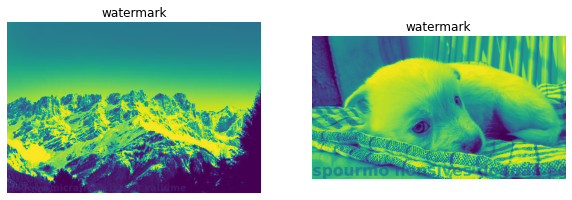

In [8]:
fig = plt.figure(figsize=(10, 8))

c=0
for path in train_path[:2]:
  # reading images
  c+=1
  Image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  fig.add_subplot(1,2, c)
  plt.imshow(Image)
  plt.axis('off')
  plt.title(path.split('/')[4])
  

In [9]:
img='/content/wm-nowm/train/watermark/pexels-photo-795188.jpeg'
img_array = cv2.imread(img)
img_array.shape

(350, 521, 3)

In [11]:
X_train=[]

for img in tqdm(train_path):
  img_array = cv2.imread(img)
  img_resized = cv2.resize(img_array,(128,128)).flatten()
  
  X_train.append(img_resized)
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 24987/24987 [01:37<00:00, 255.69it/s]


In [12]:
X_test=[]

for img in tqdm(test_path):
  img_array = cv2.imread(img)
  img_resized = cv2.resize(img_array,(128,128)).flatten()
  
  X_test.append(img_resized)
X_test = np.array(X_test)
y_test = np.array(y_test)


100%|██████████| 6588/6588 [00:24<00:00, 265.39it/s]


In [13]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (24987, 49152)
x test:  (6588, 49152)
y train:  (24987,)
y test:  (6588,)


In [14]:
from sklearn.linear_model import LogisticRegression

logistic_regression=LogisticRegression(random_state=42)

logistic_regression.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [18]:
y_prediction=logistic_regression.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

print("Accuracy score:",100*accuracy_score(y_prediction,y_test))

Accuracy score: 50.03035822707954
